In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
train = pd.read_csv(r"/content/drive/MyDrive/CSE422 LAB/Air Quality Index Project/city_day.csv")
train.shape

(29531, 16)

In [ ]:
train.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,Moderate
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,Moderate
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,Moderate
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,Moderate
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,Moderate
5,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,Moderate
6,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,Moderate
7,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,Moderate
8,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,Moderate
9,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,Moderate


In [ ]:
train.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Finding and handling the null values

In [ ]:
def missing_data_func(x):
    null_values = x.isnull().sum().sort_values(ascending=False)
    null_values_perc = (x.isnull().sum() / x.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([null_values, null_values_perc], axis=1, keys=['Total', 'Percentage'])
    return missing_data
missing_data_func(train)

,Total,Percentage
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [ ]:
train.drop(['AQI'], axis=1, inplace=True)
train.drop(['City'], axis=1, inplace=True)
train.drop(['Date'], axis=1, inplace=True)
train.drop(['Xylene'], axis=1, inplace=True) # null values over 60 percent
train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,Satisfactory


In [ ]:
train['AQI_Bucket'].fillna(train['AQI_Bucket'].mode()[0], inplace=True)
train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,Moderate
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,Moderate
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,Moderate
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,Moderate
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,Satisfactory


{'Moderate': 13510, 'Satisfactory': 8224, 'Poor': 2781, 'Very Poor': 2337, 'Good': 1341, 'Severe': 1338}


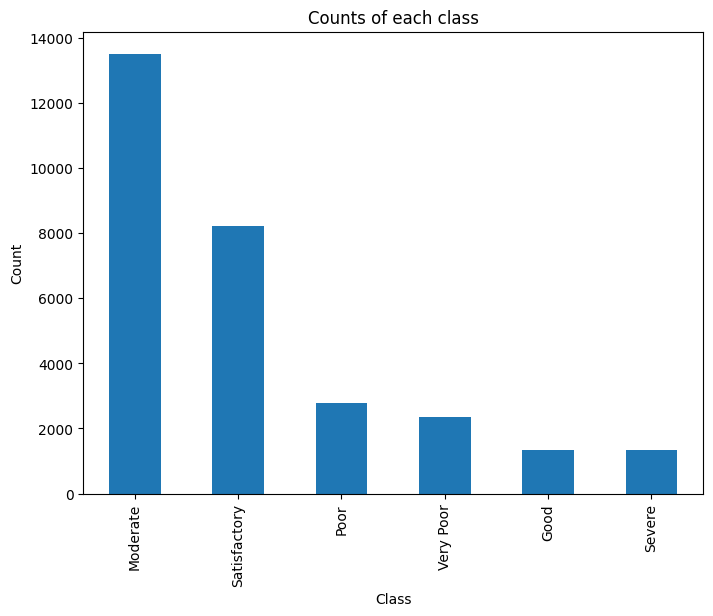

In [ ]:
counts_dict = dict(train['AQI_Bucket'].value_counts())
print(counts_dict)
class_counts = train['AQI_Bucket'].value_counts()

plt.figure(figsize=(8,6))
class_counts.plot.bar()
plt.title('Counts of each class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig("uniqueclasses.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
x = train.iloc[:, :-1]
x_col_names = x.columns.tolist()
# x_col_names # only the numerical values (features)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
x = imputer.transform(x)
df_x = pd.DataFrame(x, columns=x_col_names)
df_x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000
...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000


In [ ]:
y = train['AQI_Bucket']
y_col_names = [y.name]
df_y = pd.DataFrame(y, columns=y_col_names)
y_encoded = pd.get_dummies(df_y) # one hot encoded target column

# Concatenate encoded target column and features
data_encoded = pd.concat([df_x, y_encoded], axis=1)

data_encoded # clean dataset with one hot encoded target column

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0,1,0,0,0,0
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,0,1,0,0,0,0
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,0,1,0,0,0,0
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,0,1,0,0,0,0
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,1,0,0,0,0,0
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0,0,0,1,0,0
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0,0,0,1,0,0
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0,0,0,1,0,0


In [ ]:
value_counts = y_encoded.apply(lambda x: tuple(x)).value_counts()

# Print the unique category and its corresponding one-hot encoded value
for cat, (index, count) in zip(counts_dict, value_counts.items()):

    print(f"{index}: {cat}: {count}")

(0, 1, 0, 0, 0, 0): Moderate: 13510
(0, 0, 0, 1, 0, 0): Satisfactory: 8224
(0, 0, 1, 0, 0, 0): Poor: 2781
(0, 0, 0, 0, 0, 1): Very Poor: 2337
(1, 0, 0, 0, 0, 0): Good: 1341
(0, 0, 0, 0, 1, 0): Severe: 1338


In [ ]:
missing_data_func(data_encoded)

,Total,Percentage
PM2.5,0,0.0
Benzene,0,0.0
AQI_Bucket_Severe,0,0.0
AQI_Bucket_Satisfactory,0,0.0
AQI_Bucket_Poor,0,0.0
AQI_Bucket_Moderate,0,0.0
AQI_Bucket_Good,0,0.0
Toluene,0,0.0
O3,0,0.0
PM10,0,0.0


# Outlier Detection and Removal


In [ ]:
outlier_idn = data_encoded['Toluene'].max()
outlier_rows = data_encoded[data_encoded['Toluene'] == outlier_idn]
outlier_rows

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
25914,27.32,36.11,0.89,2.78,1.21,2.86,0.25,4.09,52.14,454.85,454.85,0,0,0,1,0,0


In [ ]:
# For handling outliers we are gonna implement Interquartile range (IQR) method
exclude = ['AQI_Bucket_Good', 'AQI_Bucket_Moderate', 'AQI_Bucket_Poor', 'AQI_Bucket_Satisfactory', 'AQI_Bucket_Severe', 'AQI_Bucket_Very Poor']

for column in data_encoded:
    if column not in exclude:
        q1 = data_encoded[column].quantile(0.01)
        q3 = data_encoded[column].quantile(0.99)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outlier_count = ((data_encoded[column] < lower_bound) | (data_encoded[column] > upper_bound)).sum()
        if outlier_count >= 1:
            data_encoded = data_encoded[(data_encoded[column] >= q1) & (data_encoded[column] <= q3)]
data_encoded.shape

(26168, 17)

# Data Visualization


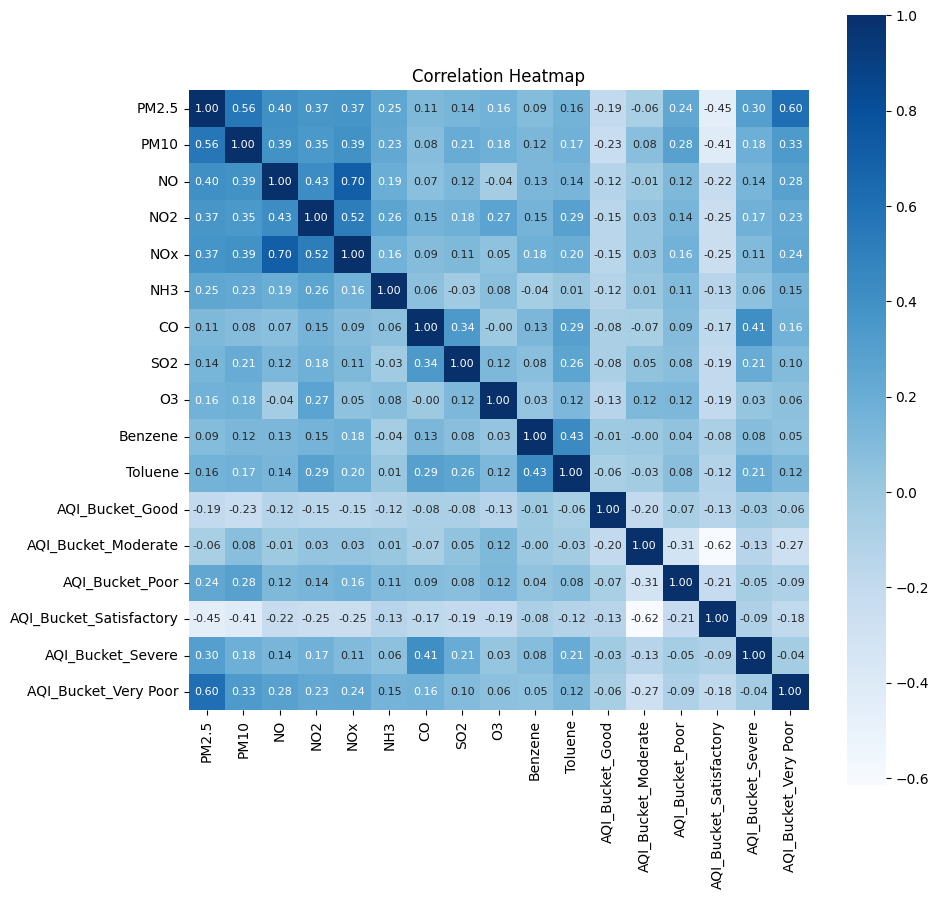

In [ ]:
corr = data_encoded.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt='.2f', cmap='Blues', annot=True, annot_kws={'size':8}, ax=ax)
plt.title('Correlation Heatmap')
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

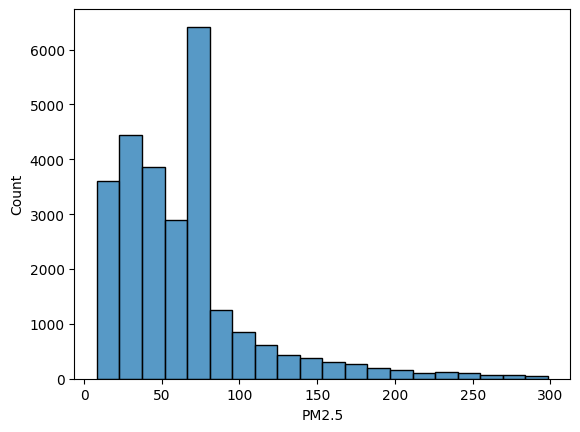

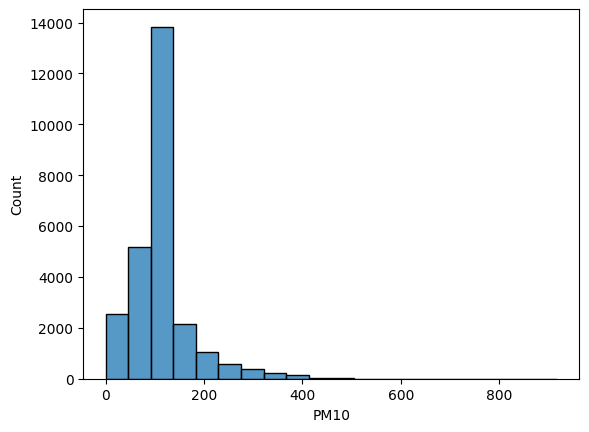

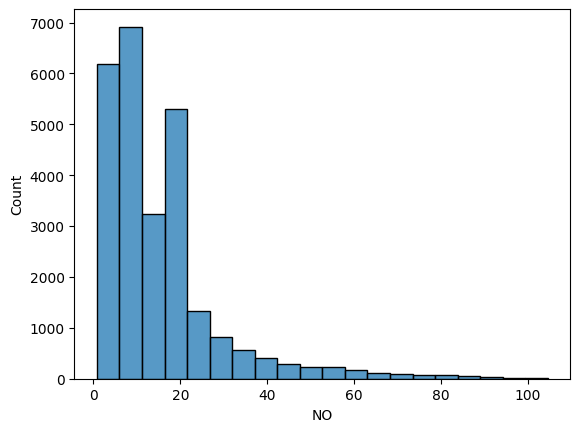

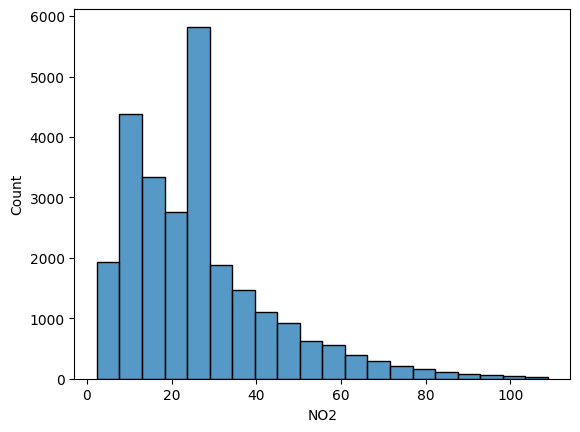

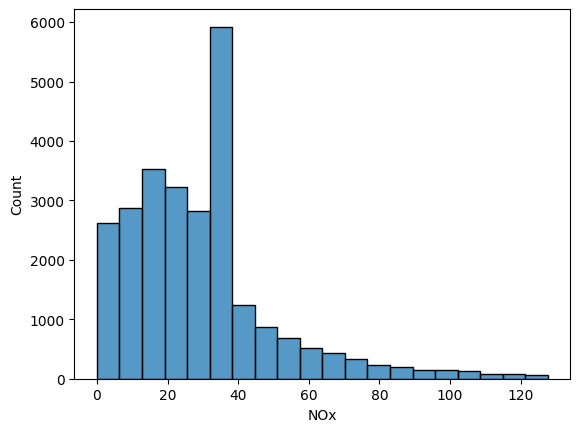

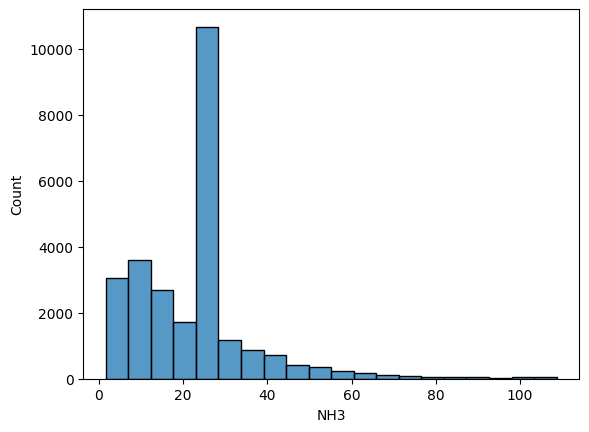

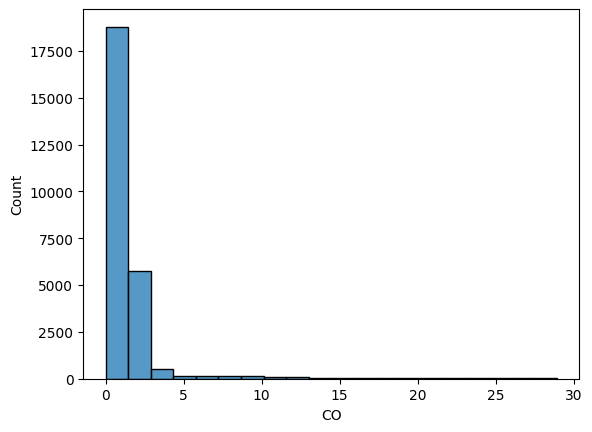

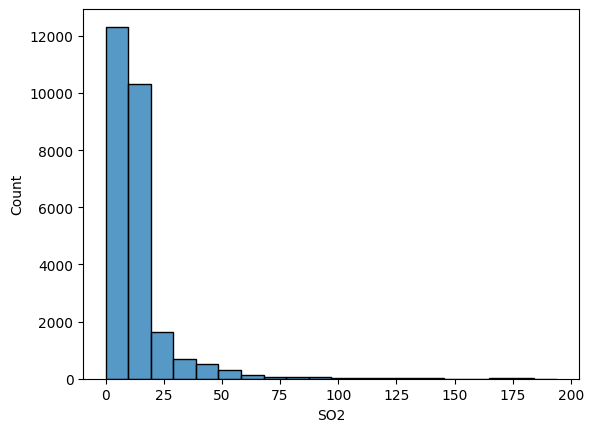

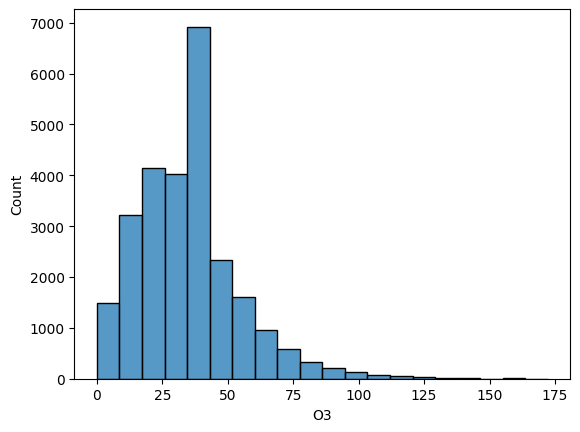

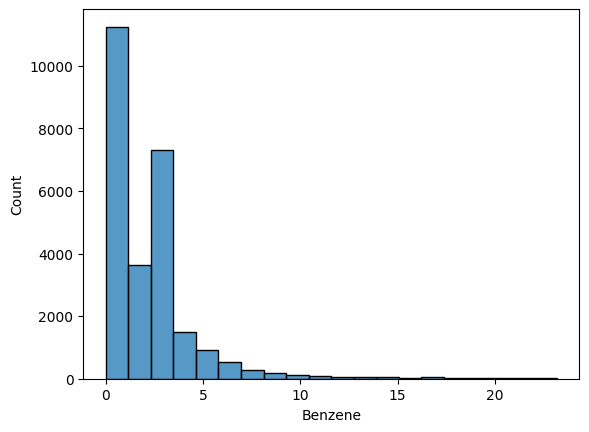

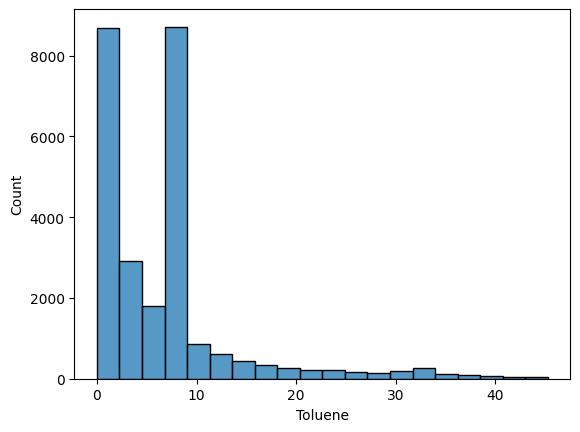

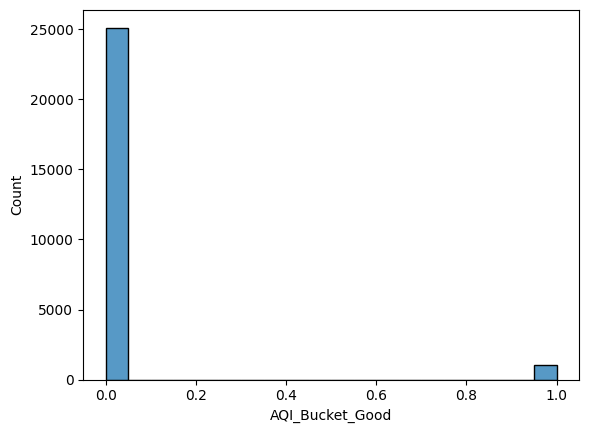

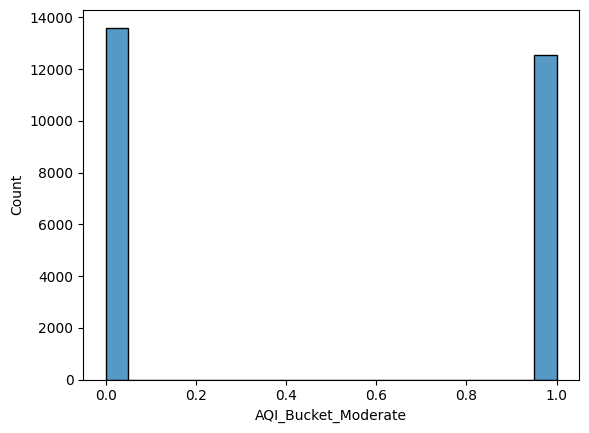

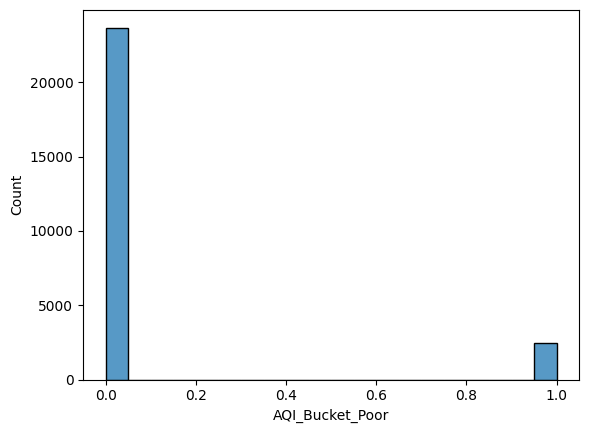

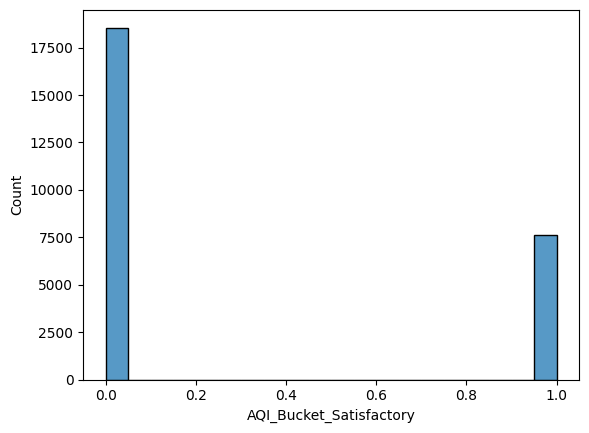

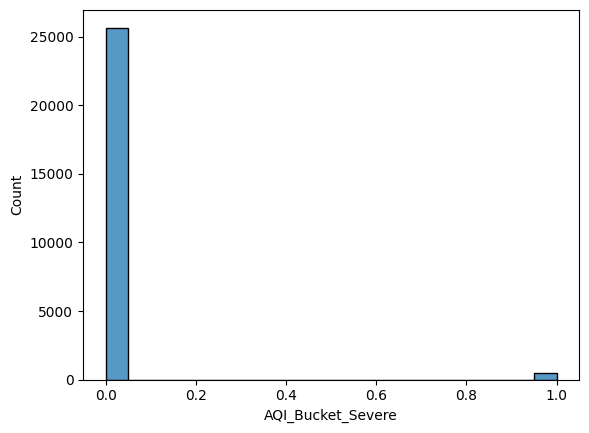

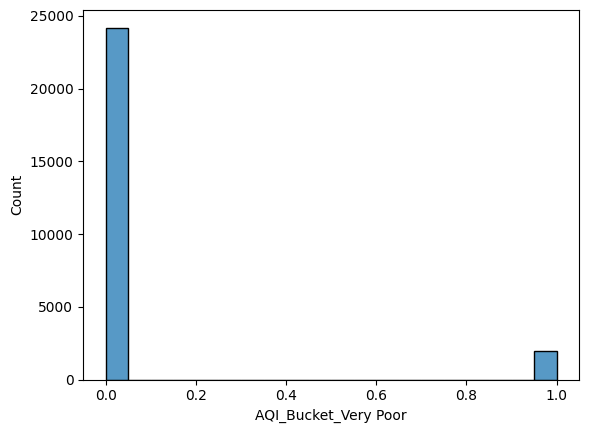

In [ ]:
for column in data_encoded.columns:
    sns.histplot(data_encoded[column], bins=20)
    plt.savefig(f"{column}histplot.png", dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
data_encoded.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
count,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000,26168.000000
mean,62.937762,115.665536,15.087734,26.629118,29.048425,22.131430,1.519366,13.357585,34.459591,2.238354,6.889231,0.039934,0.479937,0.095002,0.290928,0.019069,0.075130
std,44.918100,62.874649,13.929000,17.150830,21.018819,14.184524,2.666958,13.725707,19.608407,2.665704,7.361634,0.195809,0.499607,0.293223,0.454199,0.136771,0.263606
min,8.320000,0.010000,0.810000,2.350000,0.000000,1.610000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.230000,80.010000,6.260000,13.320000,14.840000,12.150000,0.530000,6.100000,20.960000,0.230000,1.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.340000,118.127103,11.160000,25.040000,27.210000,23.483476,0.930000,10.320000,34.491430,1.700000,6.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.832500,118.127103,17.574730,32.720000,33.240000,23.483476,1.590000,14.531977,42.610000,3.280840,8.700972,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,298.350000,917.080000,104.570000,108.850000,127.680000,108.720000,28.910000,193.860000,172.280000,23.170000,45.260000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split

In [ ]:
data_x = data_encoded.iloc[:, :11]
data_y = data_encoded.iloc[:, 11:]
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1) 
# random state is used to get consistent result, because everytime the random_state is set to 1, the train and test data will look the same else the data will split differently and accuracy may reduce
x_train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
6290,21.550000,57.170000,4.82000,13.870000,15.890000,6.540000,0.660000,7.220000,12.34000,0.45,0.940000
19097,67.450578,118.127103,17.57473,28.560659,31.070000,7.070000,0.000000,14.531977,34.49143,1.18,0.000000
20049,62.190000,118.127103,10.15000,12.360000,4.220000,23.483476,2.100000,9.240000,29.04000,0.09,0.180000
14112,73.330000,200.770000,6.29000,12.450000,23.670000,17.600000,0.590000,22.510000,59.44000,4.30,8.700972
11631,159.560000,298.850000,21.22000,47.390000,45.590000,48.630000,1.430000,17.100000,45.43000,4.98,35.390000
...,...,...,...,...,...,...,...,...,...,...,...
12780,139.540000,118.127103,7.83000,10.440000,32.309123,23.483476,2.248598,8.570000,13.18000,3.81,37.770000
19552,18.300000,34.870000,7.84000,19.490000,27.280000,15.070000,0.450000,3.620000,11.89000,22.17,14.370000
6087,22.970000,61.340000,14.39000,25.680000,31.740000,14.770000,1.000000,5.380000,24.82000,0.93,40.690000
14093,89.550000,152.360000,38.49000,18.770000,83.290000,18.520000,1.060000,22.360000,36.19000,2.94,8.700972


# Feature Scaling

In [ ]:
# scaling train and test data individually to avoid data leakage of the target column
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train 

array([[-9.19800745e-01, -9.25407006e-01, -7.40978798e-01, ...,
        -1.13187052e+00, -6.69188666e-01, -8.04198143e-01],
       [ 1.01059208e-01,  3.99168961e-02,  1.82287991e-01, ...,
         4.97917075e-03, -3.94430847e-01, -9.31409044e-01],
       [-1.59396099e-02,  3.99168961e-02, -3.55160194e-01, ...,
        -2.74797662e-01, -8.04685673e-01, -9.07049510e-01],
       ...,
       [-8.88218983e-01, -8.59370392e-01, -4.82425810e-02, ...,
        -4.91375354e-01, -4.88525990e-01,  4.57519901e+00],
       [ 5.92565327e-01,  5.82033109e-01,  1.69626555e+00, ...,
         9.21526940e-02,  2.67998966e-01,  2.46099998e-01],
       [ 6.18364513e-01,  3.99168961e-02,  2.21758055e-01, ...,
        -4.29789281e-01,  1.91654588e+00,  4.98389786e+00]])

# Model Training


In [ ]:
# used to convert these class labels into a one-dimensional array of integers, where each integer value represents the class/label of the corresponding input feature set
y_train_enc = np.argmax(y_train.values, axis=1) 
y_test_enc = np.argmax(y_test.values, axis=1) 
y_test_np = y_test.values
prec_recal_dict = {}
y_test_enc

array([1, 1, 5, ..., 5, 1, 1])

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
micro_precision_rf = report_rf['micro avg']['precision']
micro_recall_rf = report_rf['micro avg']['recall']
prec_recal_dict["Random Forest"] = (micro_precision_rf, micro_recall_rf)

print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print(prec_recal_dict)

Accuracy: 0.7841039358043561
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       304
           1       0.87      0.86      0.86      3808
           2       0.73      0.53      0.61       751
           3       0.82      0.81      0.82      2259
           4       0.68      0.38      0.49       141
           5       0.79      0.71      0.75       588

   micro avg       0.84      0.78      0.81      7851
   macro avg       0.78      0.65      0.71      7851
weighted avg       0.83      0.78      0.81      7851
 samples avg       0.78      0.78      0.78      7851

{'Random Forest': (0.8359587180879956, 0.7841039358043561)}


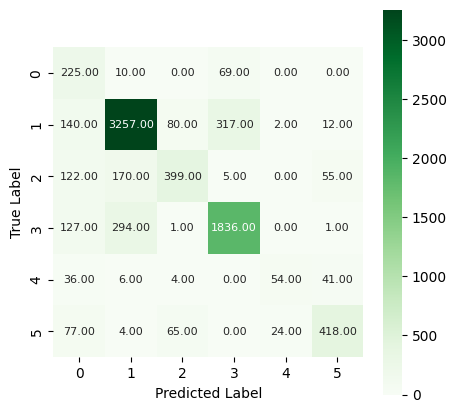

In [ ]:
cm_rf = confusion_matrix(y_test_enc, y_pred_rf.argmax(axis=1))

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_rf, cbar=True, square=True, fmt='.2f', cmap='Greens', annot=True, annot_kws={'size':8}, ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confmatr_rf.png", dpi=300, bbox_inches='tight')
plt.show()

Decision Tree 

In [ ]:
dtc = DecisionTreeClassifier(random_state=5)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)


accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True, zero_division=0)
micro_precision_dtc = report_dtc['micro avg']['precision']
micro_recall_dtc = report_dtc['micro avg']['recall']
prec_recal_dict["Decision Tree"] = (micro_precision_dtc, micro_recall_dtc)

print("Accuracy:", accuracy_dtc)
print(classification_report(y_test, y_pred_dtc))
print(prec_recal_dict)
# The "micro avg" metric is the overall precision, recall, and F1-score for all classes combined. 
# The "macro avg" metric is the average of precision, recall, and F1-score for all classes. 
# The "weighted avg" metric is the weighted average of precision, recall, and F1-score for all classes. It takes into account the number of samples in each class. 
# The "samples avg" metric is the average of the metrics for each individual label, weighted by the number of true instances for each label.
# "support" refers to the number of instances in each class. It is the number of samples in the test dataset that belong to each class.

Accuracy: 0.7285696089670106
              precision    recall  f1-score   support

           0       0.56      0.62      0.59       304
           1       0.79      0.80      0.80      3808
           2       0.55      0.57      0.56       751
           3       0.74      0.70      0.72      2259
           4       0.49      0.52      0.51       141
           5       0.67      0.65      0.66       588

   micro avg       0.73      0.73      0.73      7851
   macro avg       0.63      0.64      0.64      7851
weighted avg       0.73      0.73      0.73      7851
 samples avg       0.73      0.73      0.73      7851

{'Random Forest': (0.8359587180879956, 0.7841039358043561), 'Decision Tree': (0.7285696089670106, 0.7285696089670106)}


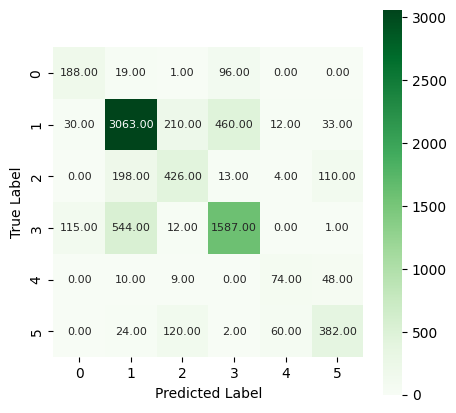

In [ ]:
cm_dtc = confusion_matrix(y_test_np.argmax(axis=1), y_pred_dtc.argmax(axis=1))

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_dtc, cbar=True, square=True, fmt='.2f', cmap='Greens', annot=True, annot_kws={'size':8}, ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confmatr_dtc.png", dpi=300, bbox_inches='tight')
plt.show()

Support Vector Machine 


In [ ]:
sm = svm.SVC(kernel='rbf') # rbf kernel maps the input data into an infinite-dimensional space using a Gaussian function.
sm.fit(x_train, y_train_enc)
y_pred_sm = sm.predict(x_test)


micro_precision_sm = precision_score(y_test_enc, y_pred_sm, average='micro')
micro_recall_sm = recall_score(y_test_enc, y_pred_sm, average='micro')

prec_recal_dict["SVM"] = (micro_precision_sm, micro_recall_sm)


accuracy_sm = accuracy_score(y_test_enc, y_pred_sm)

print("Accuracy:", accuracy_sm)
print(classification_report(y_test_enc, y_pred_sm))
print(prec_recal_dict)

Accuracy: 0.7811743726913769
              precision    recall  f1-score   support

           0       0.85      0.27      0.41       304
           1       0.84      0.84      0.84      3808
           2       0.67      0.56      0.61       751
           3       0.74      0.84      0.79      2259
           4       0.62      0.45      0.52       141
           5       0.72      0.76      0.74       588

    accuracy                           0.78      7851
   macro avg       0.74      0.62      0.65      7851
weighted avg       0.78      0.78      0.77      7851

{'Random Forest': (0.8359587180879956, 0.7841039358043561), 'Decision Tree': (0.7285696089670106, 0.7285696089670106), 'SVM': (0.7811743726913769, 0.7811743726913769)}


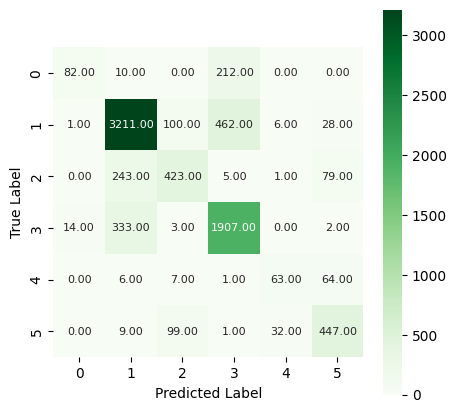

In [ ]:
cm_sm = confusion_matrix(y_test_enc, y_pred_sm)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_sm, cbar=True, square=True, fmt='.2f', cmap='Greens', annot=True, annot_kws={'size':8}, ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confmatr_sm.png", dpi=300, bbox_inches='tight')
plt.show()

K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True, zero_division=0)
micro_precision_knn = report_knn['micro avg']['precision']
micro_recall_knn = report_knn['micro avg']['recall']
prec_recal_dict["KNN"] = (micro_precision_knn, micro_recall_knn)

print("Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))
print(prec_recal_dict)

Accuracy: 0.7625780155394217
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       304
           1       0.84      0.83      0.84      3808
           2       0.63      0.49      0.55       751
           3       0.77      0.80      0.79      2259
           4       0.56      0.43      0.48       141
           5       0.73      0.68      0.70       588

   micro avg       0.78      0.76      0.77      7851
   macro avg       0.70      0.64      0.66      7851
weighted avg       0.78      0.76      0.77      7851
 samples avg       0.76      0.76      0.76      7851

{'Random Forest': (0.8359587180879956, 0.7841039358043561), 'Decision Tree': (0.7285696089670106, 0.7285696089670106), 'SVM': (0.7811743726913769, 0.7811743726913769), 'KNN': (0.7846657929226737, 0.7625780155394217)}


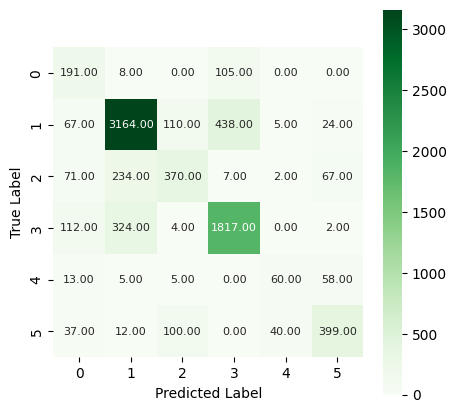

In [ ]:
cm_knn = confusion_matrix(y_test_np.argmax(axis=1), y_pred_knn.argmax(axis=1))

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_knn, cbar=True, square=True, fmt='.2f', cmap='Greens', annot=True, annot_kws={'size':8}, ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confmatr_knn.png", dpi=300, bbox_inches='tight')
plt.show()

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train_enc)
y_pred_logreg = logreg.predict(x_test)

accuracy_logreg = logreg.score(x_test, y_test_enc)
micro_precision_logreg = precision_score(y_test_enc, y_pred_logreg, average='micro')
micro_recall_logreg = recall_score(y_test_enc, y_pred_logreg, average='micro')
prec_recal_dict["Logistic Regression"] = (micro_precision_logreg, micro_recall_logreg)

print(prec_recal_dict)
print("accuracy:", accuracy_logreg)
print(classification_report(y_test_enc, y_pred_logreg))

{'Random Forest': (0.8359587180879956, 0.7841039358043561), 'Decision Tree': (0.7285696089670106, 0.7285696089670106), 'SVM': (0.7811743726913769, 0.7811743726913769), 'KNN': (0.7846657929226737, 0.7625780155394217), 'Logistic Regression': (0.7520061138708445, 0.7520061138708445)}
accuracy: 0.7520061138708445
              precision    recall  f1-score   support

           0       0.72      0.30      0.42       304
           1       0.79      0.85      0.82      3808
           2       0.64      0.44      0.52       751
           3       0.73      0.78      0.75      2259
           4       0.54      0.38      0.45       141
           5       0.71      0.72      0.72       588

    accuracy                           0.75      7851
   macro avg       0.69      0.58      0.61      7851
weighted avg       0.75      0.75      0.74      7851



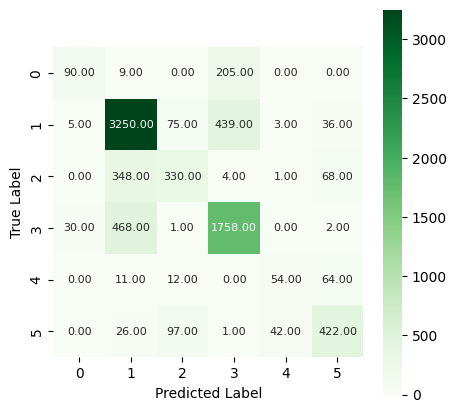

In [ ]:
cm_logreg = confusion_matrix(y_test_enc, y_pred_logreg)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_logreg, cbar=True, square=True, fmt='.2f', cmap='Greens', annot=True, annot_kws={'size':8}, ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confmatr_logreg.png", dpi=300, bbox_inches='tight')
plt.show()

Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train_enc)
y_pred_nb = nb_model.predict(x_test)

accuracy_nb = nb_model.score(x_test, y_test_enc)
micro_precision_nb = precision_score(y_test_enc, y_pred_nb, average='micro')
micro_recall_nb = recall_score(y_test_enc, y_pred_nb, average='micro')
prec_recal_dict["Naive Bayes"] = (micro_precision_nb, micro_recall_nb)

print(prec_recal_dict)
print("accuracy:", accuracy_nb)
print(classification_report(y_test_enc, y_pred_nb))

{'Random Forest': (0.8359587180879956, 0.7841039358043561), 'Decision Tree': (0.7285696089670106, 0.7285696089670106), 'SVM': (0.7811743726913769, 0.7811743726913769), 'KNN': (0.7846657929226737, 0.7625780155394217), 'Logistic Regression': (0.7520061138708445, 0.7520061138708445), 'Naive Bayes': (0.6802955037574832, 0.6802955037574832)}
accuracy: 0.6802955037574832
              precision    recall  f1-score   support

           0       0.34      0.66      0.45       304
           1       0.83      0.72      0.77      3808
           2       0.51      0.47      0.49       751
           3       0.66      0.71      0.69      2259
           4       0.27      0.49      0.35       141
           5       0.63      0.64      0.63       588

    accuracy                           0.68      7851
   macro avg       0.54      0.62      0.56      7851
weighted avg       0.71      0.68      0.69      7851



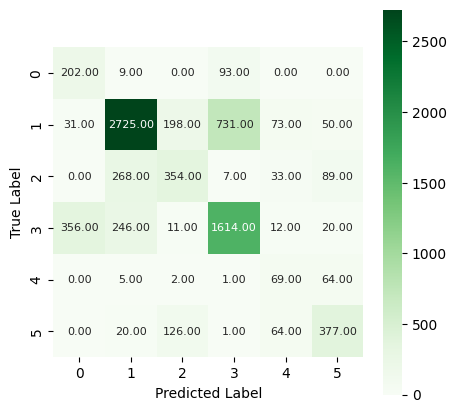

In [ ]:
cm_nb = confusion_matrix(y_test_enc, y_pred_nb)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_nb, cbar=True, square=True, fmt='.2f', cmap='Greens', annot=True, annot_kws={'size':8}, ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confmatr_nb.png", dpi=300, bbox_inches='tight')
plt.show()

# Comparing the Models

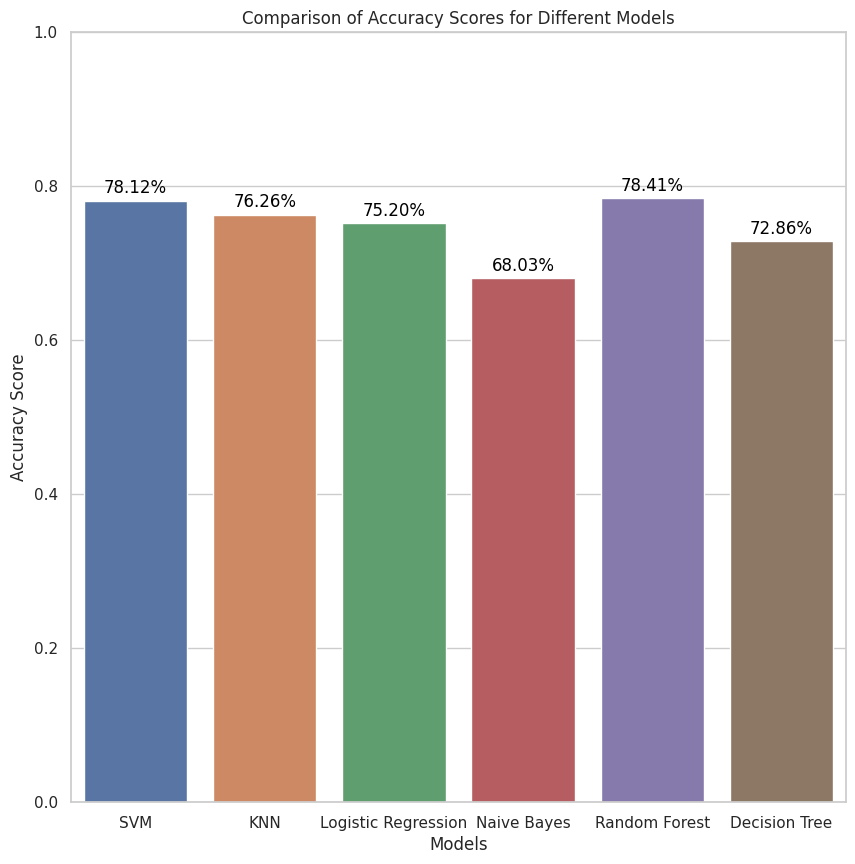

In [ ]:
models = ['SVM', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree']
accuracy_scores = [accuracy_sm, accuracy_knn, accuracy_logreg, accuracy_nb, accuracy_rf, accuracy_dtc]

sns.set(style="whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10, 10))
ax = sns.barplot(x=models, y=accuracy_scores)
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')


for i, v in enumerate(accuracy_scores):
    ax.text(i, v+0.01, '{:.2%}'.format(v), color='black', ha='center')

plt.savefig(f"comparison.png", dpi=300, bbox_inches='tight')
plt.show()

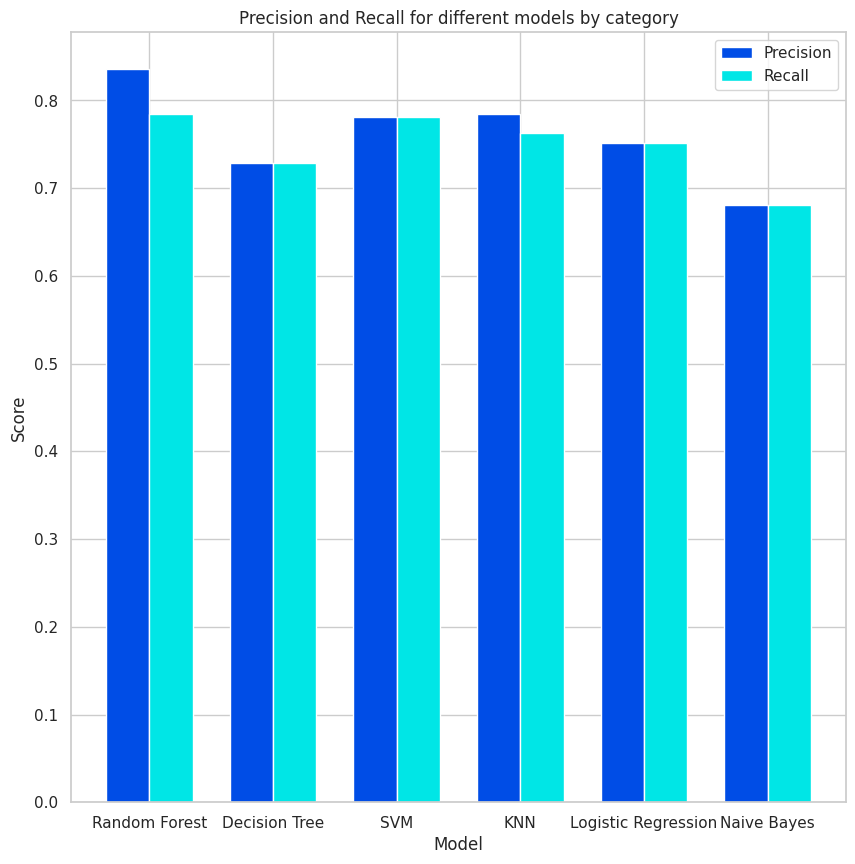

In [ ]:
labels = list(prec_recal_dict.keys())
precision = [value[0] for value in prec_recal_dict.values()]
recall = [value[1] for value in prec_recal_dict.values()]

plt.figure(figsize=(10, 10))
bar_width = 0.35

r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]

plt.bar(r1, precision, color=(0, 0.3, 0.9), width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, recall, color=(0, 0.9, 0.9), width=bar_width, edgecolor='white', label='Recall')

plt.xlabel('Model')
plt.xticks([r + bar_width/2 for r in range(len(precision))], labels)
plt.ylabel('Score')
plt.title('Precision and Recall for different models by category')
plt.legend()
plt.savefig(f"pandrcomp.png", dpi=300, bbox_inches='tight')
plt.show()